In [138]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, filters, img_as_ubyte


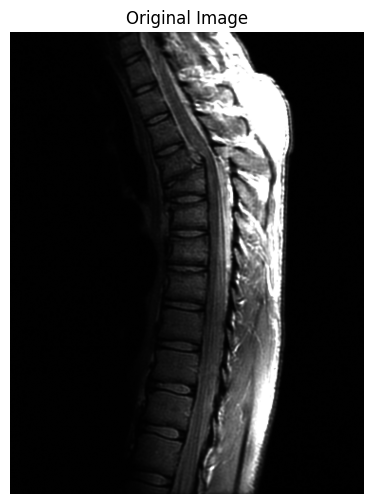

In [139]:
# Load the image
original_image = io.imread('Fig0308(a)(fractured_spine).tif')
plt.figure(figsize=(6,6))
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')
plt.show()


# Parameters to optimize

In [ ]:
# Experiment with different c values
c_values = [ 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 3, 4, 5]
# Experiment with different r values for power law transformation
r_values = [0.1,0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2, 3,4,5]

## Log transformation function

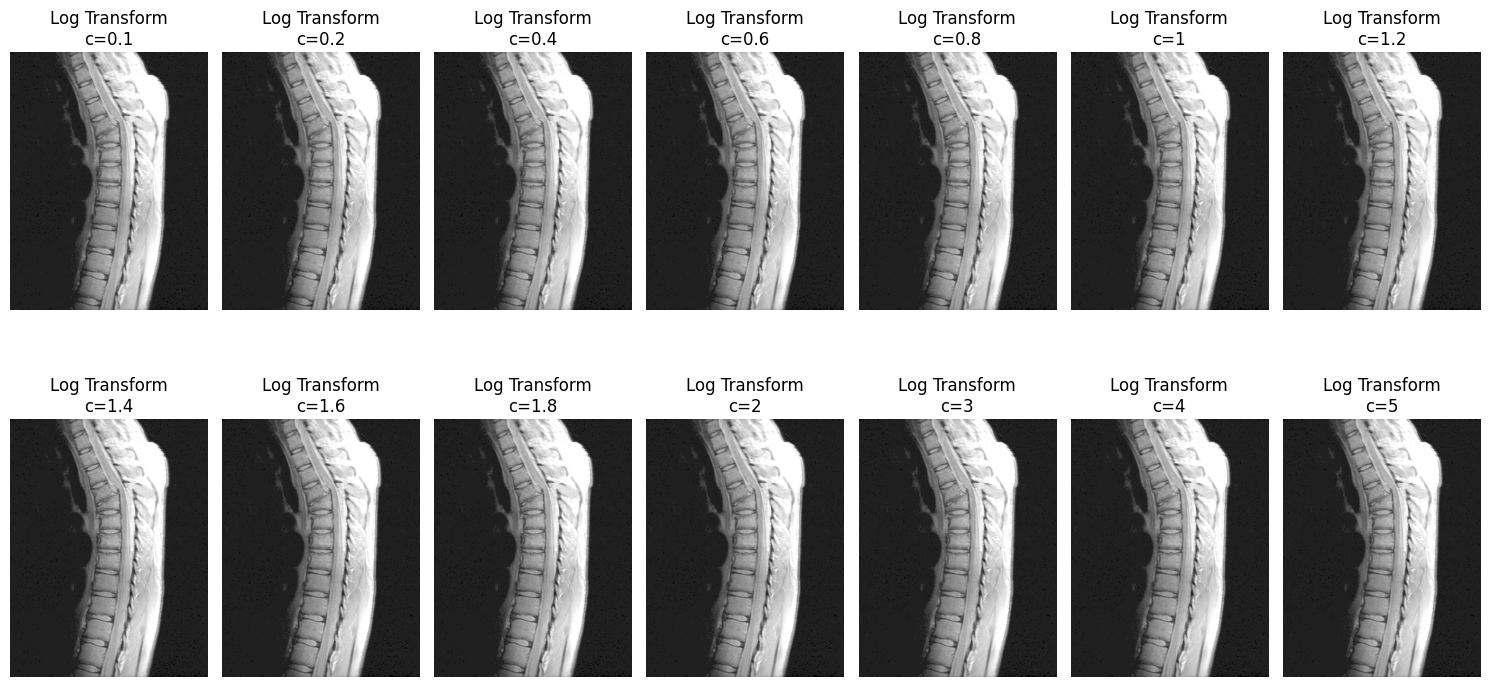

In [141]:
# Log transformation function
def log_transform(image, c=1.0):
    image = image.astype(np.uint8)
    image_log = c * np.log1p(image)
    image_log = image_log / np.max(image_log)  # Normalize to [0,1]
    image_log = img_as_ubyte(image_log)
    return image_log

# Layout parameters
n_cols = 7
n_rows = int(np.ceil(len(c_values) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

# Flatten axes for easy indexing (in case of single row/column)
axes = axes.flatten()

for i, c in enumerate(c_values):
    if c == 0:
        img_log = original_image  # No transformation
    else:
        img_log = log_transform(original_image, c)

    axes[i].imshow(img_log, cmap='gray')
    axes[i].set_title(f'Log Transform\nc={c}')
    axes[i].axis('off')

# Hide any empty subplots (if total number of c_values isn't a multiple of n_cols)
for j in range(len(c_values), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Power law (gamma) transformation function

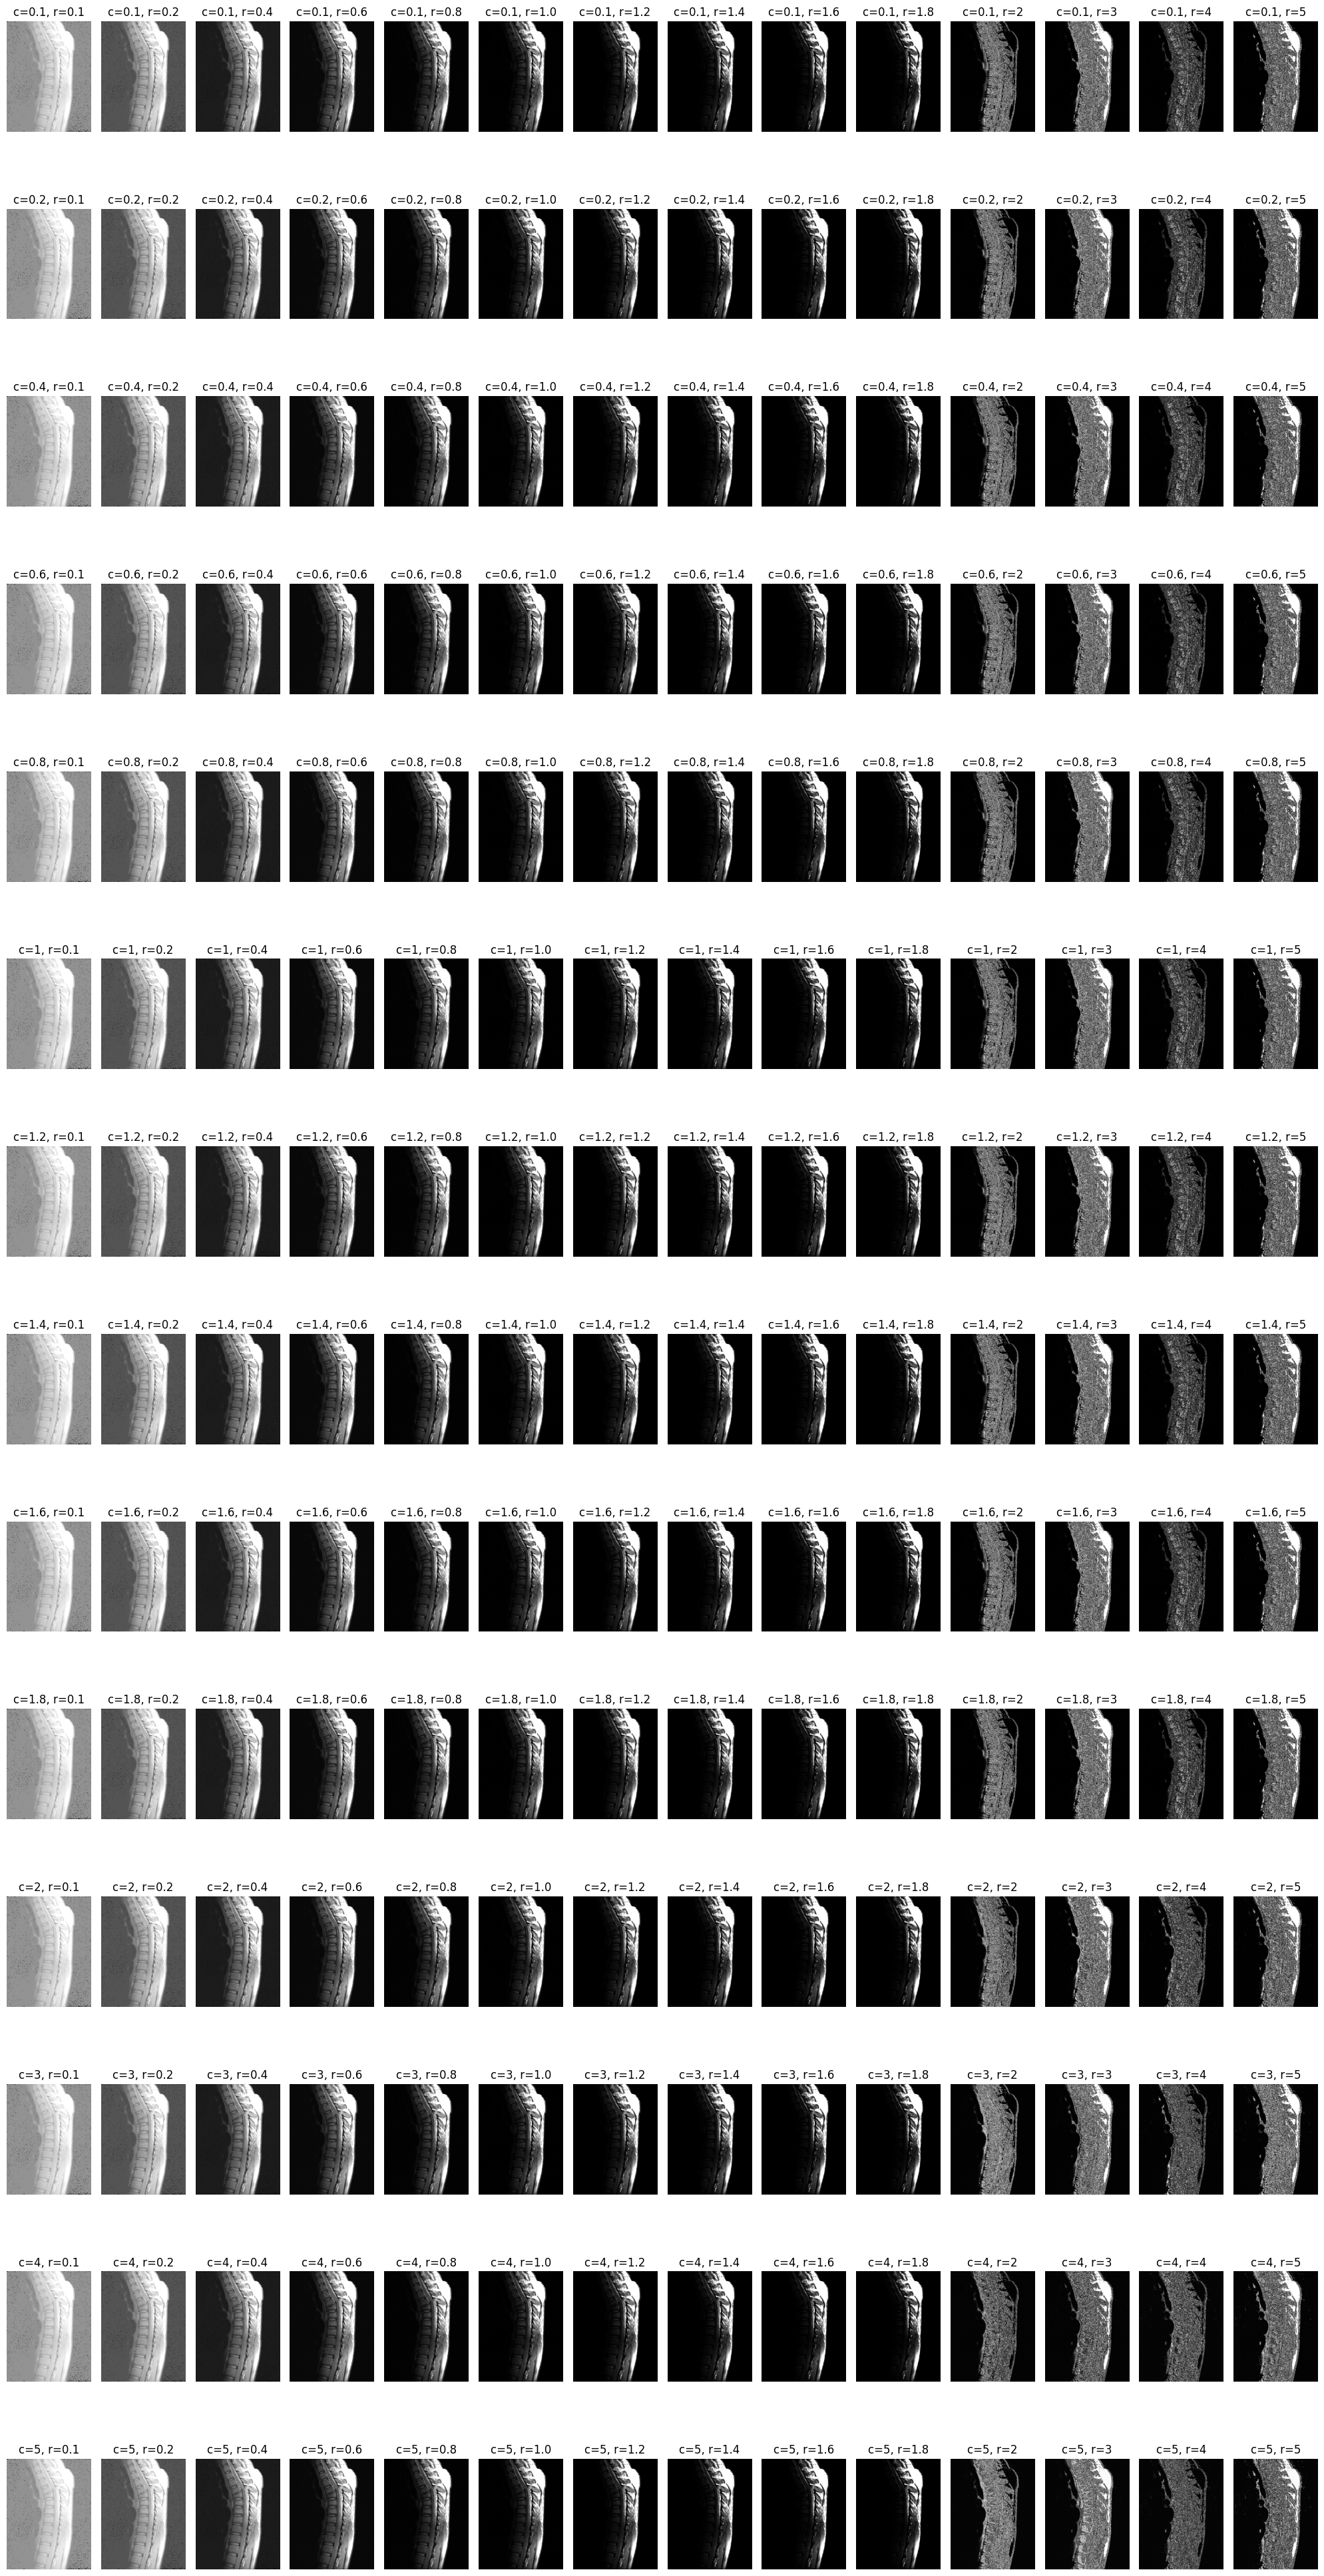

In [145]:
def power_law_transform(image, c=1.0, r=1.0):
    image = image.astype(np.uint8)
    image_gamma = c * np.power(image, r)
    image_gamma = image_gamma / np.max(image_gamma)  # Normalize to [0,1]
    image_gamma = img_as_ubyte(image_gamma)
    return image_gamma

fig, axes = plt.subplots(len(c_values), len(r_values), figsize=(20,40))
for i, c in enumerate(c_values):
    for j, r in enumerate(r_values):
        if c==0:
            img_gamma = original_image  # No transformation
        else:
            img_gamma = power_law_transform(original_image, c, r)
        axes[i, j].imshow(img_gamma, cmap='gray')
        axes[i, j].set_title(f'c={c}, r={r}')
        axes[i, j].axis('off')
# plt.suptitle('Power Law (Gamma) Transformations')
plt.tight_layout()
plt.show()


# Histogram Equalization

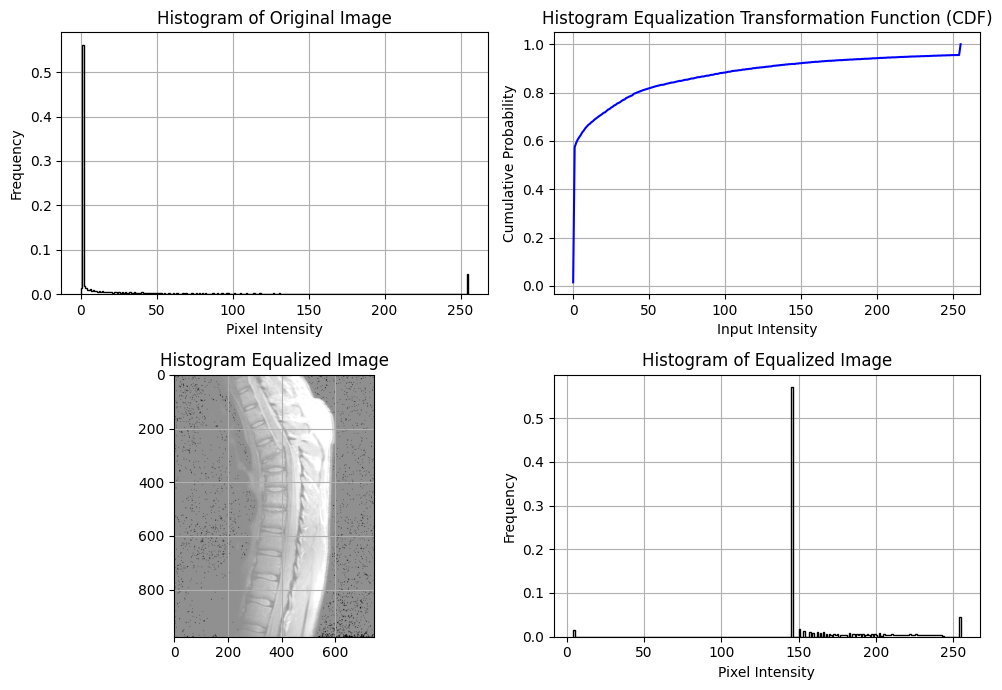

In [ ]:
figure, subplots = plt.subplots(2, 2, figsize=(10,7))

subplots[0,0].hist(original_image.ravel(), bins=256, histtype='step', color='blue', density=True)
subplots[0,0].set_title('Histogram of Original Image')
subplots[0,0].set_xlabel('Pixel Intensity')
subplots[0,0].set_ylabel('Frequency')
subplots[0,0].grid(True)


hist, bins = np.histogram(original_image.flatten(), bins=256, range=[0,256], density=True)
cdf = hist.cumsum()
cdf = cdf / cdf[-1]  # Normalize

subplots[0,1].plot(bins[:-1], cdf, color='blue')
subplots[0,1].set_title('Histogram Equalization Transformation Function (CDF)')
subplots[0,1].set_xlabel('Input Intensity')
subplots[0,1].set_ylabel('Cumulative Probability')
subplots[0,1].grid(True)


image_eq = exposure.equalize_hist(original_image)
image_eq = img_as_ubyte(image_eq) 
subplots[1,0].imshow(image_eq, cmap='gray')
subplots[1,0].set_title('Histogram Equalized Image')
subplots[1,0].grid(True)

subplots[1,1].hist(image_eq.ravel(), bins=256, histtype='step', color='blue', density=True)
subplots[1,1].set_title('Histogram of Equalized Image')
subplots[1,1].set_xlabel('Pixel Intensity')
subplots[1,1].set_ylabel('Frequency')
subplots[1,1].grid(True)
plt.tight_layout()
plt.show()

# Results section

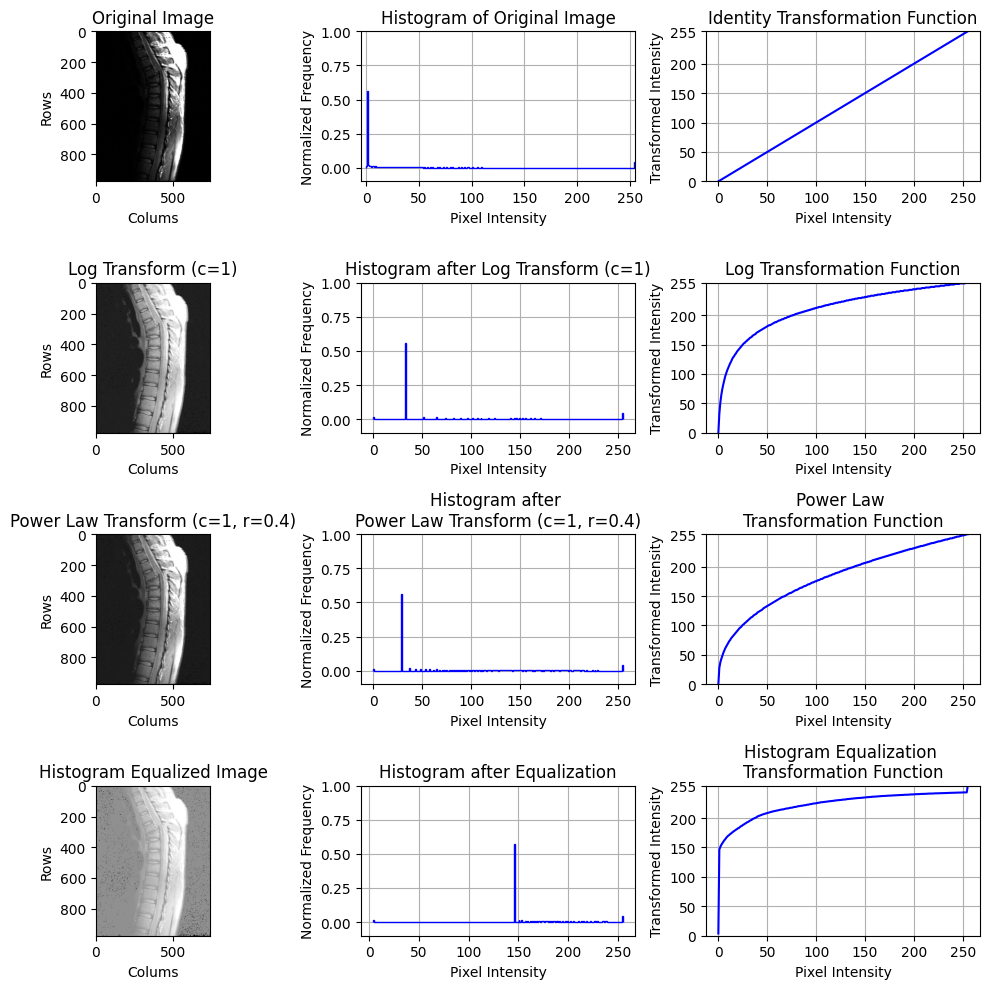

In [149]:
figure, subplots = plt.subplots(4, 3, figsize=(10,10))

subplots[0, 0].imshow(original_image, cmap='gray', vmin=original_image.min(), vmax=original_image.max())
subplots[0, 0].set_title('Original Image')
subplots[0,0].set_xlabel('Colums')
subplots[0,0].set_ylabel('Rows')

subplots[0, 1].hist(original_image.ravel(), bins=256, histtype='step',  density=True, color='blue')
subplots[0, 1].set_title('Histogram of Original Image')
subplots[0,1].set_xlim([-5,255])
subplots[0,1].set_ylim([-0.1,1]) 
subplots[0,1].set_xlabel('Pixel Intensity')
subplots[0,1].set_ylabel('Normalized Frequency')
subplots[0,1].grid(True)

subplots[0, 2].plot(np.arange(0,256), np.arange(0,256), color='blue')
subplots[0,2].set_title('Identity Transformation Function')
subplots[0,2].set_xlabel('Pixel Intensity')
subplots[0,2].set_ylabel('Transformed Intensity')
subplots[0,2].set_ylim([0,255])
# subplots[0,2].set_yticklabels([0,50,100,150,200,255])
subplots[0,2].set_yticks([0,50,100,150,200,255])
subplots[0,2].grid(True)

# log transformation with c=1
img_log = log_transform(original_image, c=1)
subplots[1, 0].imshow(img_log, cmap='gray', vmin=img_log.min(), vmax=img_log.max())
subplots[1, 0].set_title('Log Transform (c=1)')
subplots[1,0].set_xlabel('Colums')
subplots[1,0].set_ylabel('Rows')
subplots[1, 1].hist(img_log.ravel(), bins=256, histtype='step', density=True, color='blue')
subplots[1, 1].set_title('Histogram after Log Transform (c=1)')
subplots[0,1].set_xlim([-5,255])
subplots[1,1].set_ylim([-0.1,1])
subplots[1,1].set_xlabel('Pixel Intensity')
subplots[1,1].set_ylabel('Normalized Frequency')
subplots[1,1].grid(True)

intensities = np.arange(0, 256)
subplots[1,2].plot(intensities, img_as_ubyte(np.log1p(intensities)/np.max(np.log1p(intensities))), color='blue')
subplots[1,2].set_title('Log Transformation Function')
subplots[1,2].set_xlabel('Pixel Intensity')
subplots[1,2].set_ylabel('Transformed Intensity')
subplots[1,2].set_ylim([0,255]) 
# subplots[1,2].set_yticklabels([0,50,100,150,200,255])
subplots[1,2].set_yticks([0,50,100,150,200,255])
subplots[1,2].grid(True)


# power law transformation with c=1, r=0.6
img_gamma = power_law_transform(original_image, c=1, r=0.4)
subplots[2, 0].imshow(img_gamma, cmap='gray', vmin=img_gamma.min(), vmax=img_gamma.max())
subplots[2, 0].set_title('Power Law Transform (c=1, r=0.4)')
subplots[2,0].set_xlabel('Colums')  
subplots[2,0].set_ylabel('Rows')
subplots[2, 1].hist(img_gamma.ravel(), bins=256, histtype='step', density=True, color='blue')
subplots[2, 1].set_title('Histogram after \nPower Law Transform (c=1, r=0.4)')
subplots[0,1].set_xlim([-5,255])    
subplots[2,1].set_ylim([-0.1,1])
subplots[2,1].set_xlabel('Pixel Intensity')
subplots[2,1].set_ylabel('Normalized Frequency')
subplots[2,1].grid(True)

intensities = np.arange(0, 256)
subplots[2,2].plot(intensities, img_as_ubyte((intensities/255)**0.4), color='blue')
subplots[2,2].set_title('Power Law \nTransformation Function')
subplots[2,2].set_xlabel('Pixel Intensity')
subplots[2,2].set_ylabel('Transformed Intensity')
subplots[2,2].set_ylim([0,255])
# subplots[2,2].set_yticklabels([0,50,100,150,200,255])
subplots[2,2].set_yticks([0,50,100,150  ,200,255])
subplots[2,2].grid(True)

# histogram equalization
image_eq = exposure.equalize_hist(original_image)
image_eq = img_as_ubyte(image_eq)
subplots[3, 0].imshow(image_eq, cmap='gray', vmin=image_eq.min(), vmax=image_eq.max())
subplots[3, 0].set_title('Histogram Equalized Image')   
subplots[3,0].set_xlabel('Colums')
subplots[3,0].set_ylabel('Rows')
subplots[3, 1].hist(image_eq.ravel(), bins=256, histtype='step', density=True, color='blue')
subplots[3, 1].set_title('Histogram after Equalization')
subplots[0,1].set_xlim([-5,255])
subplots[3,1].set_ylim([-0.1,1])
subplots[3,1].set_xlabel('Pixel Intensity')
subplots[3,1].set_ylabel('Normalized Frequency')
subplots[3,1].grid(True)

hist, bins = np.histogram(original_image.flatten(), bins=256, range=[0,256], density=True)
cdf = hist.cumsum()
cdf = cdf *255  # Normalize

subplots[3,2].plot(bins[:-1], cdf, color='blue')
subplots[3,2].set_title('Histogram Equalization \nTransformation Function')
subplots[3,2].set_xlabel('Pixel Intensity')
subplots[3,2].set_ylabel('Transformed Intensity')
subplots[3,2].set_ylim([0,255])
# subplots[3,2].set_yticklabels([0,50,100,150,200,255])
subplots[3,2].set_yticks([0,50,100,150,200,255])
subplots[3,2].grid(True)


plt.tight_layout()

